In [1]:
import pandas as pd
import numpy as np
#for image loading progress
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
#for saving and load model 
import pickle
#time package to calculate time required to train model
import time
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
!pwd

/home/k3xri/Desktop/exm/submission/AI_PRAC_40m


In [3]:
#MNIST dataset is downloaded in locally 
#data-set link : 
# https://github.com/parmarkamlesh/ai-handwritten-character-recognition-assignment/blob/master/Train_UQcUa52.zip
df = pd.read_csv('Train_UQcUa52/train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [4]:
imagepath='Train_UQcUa52/Images/train/'

In [5]:
#Read/load MNIST data set and scale 
X = np.array([img_to_array(load_img(imagepath+df['filename'][i], target_size=(28,28,1), grayscale=True))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

In [6]:
y = df['label']

In [7]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


4


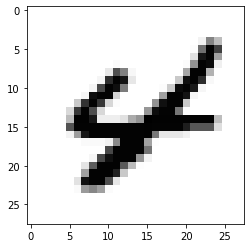

In [8]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')


2


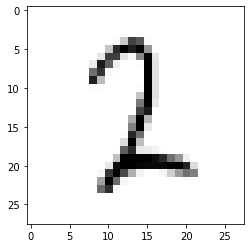

In [9]:
image_index = 10
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

1


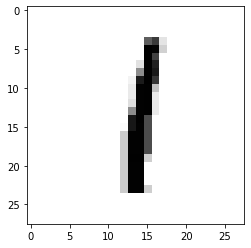

In [10]:
image_index = 192
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

In [13]:
# image pixel range from 0 to 255,
# to train model and improve accuracy i divide pixel by 255
x_train /= 255
x_test /= 255

In [14]:
input_shape = (28,28,1)
output_class = 10

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# define the model
model = Sequential()
#2D Convolution Layer
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
#flatten image.
model.add(Flatten())
#linear layer all the sample are in linear array
model.add(Dense(128, activation=tf.nn.relu))
#avoid overfitting droping 30% of data
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

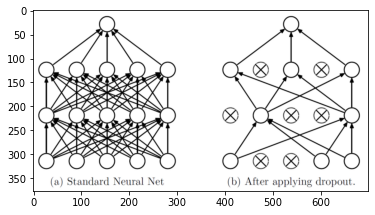

In [16]:
#understanding dropout
import matplotlib.image as mpimg
dimg = mpimg.imread('dropout.png')
plt.imshow(dimg)

In [17]:
# train the model
start_time = time.time()
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))
print("Training model took %s Seconds" % (time.time() - start_time))

Epoch 1/30
1149/1149 [==============================] - 41s 35ms/step - loss: 0.2879 - accuracy: 0.9129 - val_loss: 0.1304 - val_accuracy: 0.9607
Epoch 2/30
1149/1149 [==============================] - 44s 39ms/step - loss: 0.1253 - accuracy: 0.9619 - val_loss: 0.0862 - val_accuracy: 0.9734
Epoch 3/30
1149/1149 [==============================] - 40s 35ms/step - loss: 0.0885 - accuracy: 0.9710 - val_loss: 0.0804 - val_accuracy: 0.9749
Epoch 4/30
1149/1149 [==============================] - 42s 37ms/step - loss: 0.0690 - accuracy: 0.9781 - val_loss: 0.0669 - val_accuracy: 0.9812
Epoch 5/30
1149/1149 [==============================] - 46s 40ms/step - loss: 0.0543 - accuracy: 0.9822 - val_loss: 0.0683 - val_accuracy: 0.9792
Epoch 6/30
1149/1149 [==============================] - 43s 37ms/step - loss: 0.0433 - accuracy: 0.9853 - val_loss: 0.0698 - val_accuracy: 0.9793
Epoch 7/30
1149/1149 [==============================] - 44s 38ms/step - loss: 0.0385 - accuracy: 0.9865 - val_loss: 0.0737 -

# Training time: 22m
# Accuracy     : 0.9957
# Loss         : 0.0129
# Val Loss     : 0.1228
# Val Accuracy : 0.9805

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

INFO:tensorflow:Assets written to: kamlesh/assets
Predicted output: 1


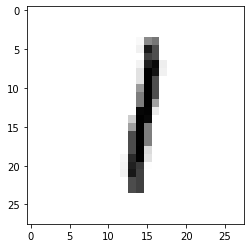

In [28]:

# path='/home/k3xri/Desktop/exm/submission/AI_PRAC_40m'
# model.save_weights(path)
# tf.keras.models.save_model(model, 'kamlesh')

# image_index = 10
# print("Original output:",y_test[image_index])
# plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
# pred = model.predict(x_test[image_index].reshape(1,28,28,1))
# print("Predicted output:", pred.argmax())

In [17]:
#Load saved model later if required
from keras.models import load_model
model =load_model('kamlesh')
#print(model)

## Testing model

Predicted output: 8


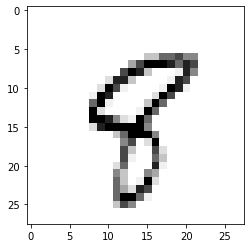

In [18]:
image_index = 100
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

In [19]:
testloss , testacc = model.evaluate(x_test,y_test)
print("test loss on sample ",testloss)
print("test accuracy", testacc)

383/383 [==============================] - 4s 11ms/step - loss: 0.1228 - accuracy: 0.9805
test loss on sample  0.1227836087346077
test accuracy 0.9804897904396057


## Testing handwriten digit

Predicted index array: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted output: 1


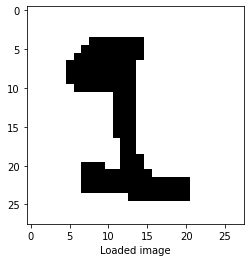

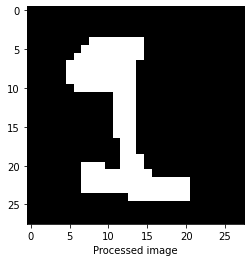

In [20]:
plt.figure()
plt.imshow(load_img("writen_digit_img.png", target_size=(28,28,1)))
plt.xlabel('Loaded image')
temp = np.array([img_to_array(load_img("writen_digit_img.png", target_size=(28,28,1), grayscale=True))]).astype('float32')
plt.figure()
plt.imshow(temp[0].reshape(28,28), cmap='Greys')
plt.xlabel('Processed image')
pred = model.predict(temp[0].reshape(1,28,28,1))
print("Predicted index array:", pred)
print("Predicted output:", pred.argmax())


Predicted index array: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted output: 2


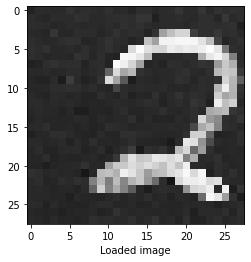

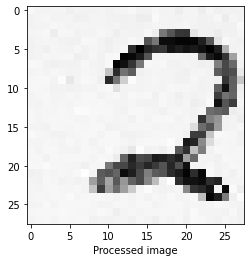

In [21]:
plt.figure()
plt.imshow(load_img("writen_digit_black_board.png", target_size=(28,28,1)))
plt.xlabel('Loaded image')
temp = np.array([img_to_array(load_img("writen_digit_black_board.png", target_size=(28,28,1), grayscale=True))]).astype('float32')
plt.figure()
plt.imshow(temp[0].reshape(28,28), cmap='Greys')
plt.xlabel('Processed image')
pred = model.predict(temp[0].reshape(1,28,28,1))
print("Predicted index array:", pred)
print("Predicted output:", pred.argmax())
